# Demo to run ECmean4 functions within the AQUA framework

We load the AQUA module

In [1]:
import sys
# sys.path.clear()
sys.path.append("/users/sughosh/AQUA")
# sys.path.insert(0, "/users/sughosh/AQUA")
from aqua import Reader
import xarray as xr

In [2]:
import aqua
aqua

<module 'aqua' from '/users/sughosh/AQUA/aqua/__init__.py'>

Start loading the ecmean functions, define the years of the experiments and experiment name. We define both atmospheric and oceanic models, as well initial and final years and the name of the configuration file. 

Call the reader for the atmospheric and oceanic components. Currently separated to avoid conflicts between variables with same name. For safety, we remove sea ice from atmospheric dataset.

In [18]:
clim_data=xr.open_mfdataset("/pfs/lustrep3/scratch/project_465000454/kkeller/AQUA/diagnostics/ecmean/ECmean4/ecmean/climatology/EC23/r360x180/*")
clim= clim_data.isel(time=0).squeeze().ta


In [48]:

# reader_atm2d = Reader(model="IFS", exp="tco79-eORCA2", source="atm2d", areas=False)
# data_atm2d = reader_atm2d.retrieve(fix=True)
# reader_atm3d = Reader(model="IFS", exp="tco79-eORCA2", source="atm3d", areas=False)
# data_atm3d = reader_atm3d.retrieve(fix=True)
# data_path= "/scratch/project_465000454/tmp/a09x/"
data_path= "/scratch/project_465000454/sughosh/replicability_data/"
data_atm2d = xr.open_mfdataset(data_path+"/atm_2d.nc")
data_atm3d = xr.open_mfdataset(data_path+"/atm_3d.nc")
data_ocean3d = xr.open_mfdataset(data_path+"/ocean_2d.nc")
data = data_atm3d.merge(data_atm2d)
data = data.merge(data_ocean3d)

# data= data.rename({"2t_mean":"2t"})
data = data.rename({"height":"plev"})
data= data.rename({"avg_siconc":"ci"})
data= data.rename({"avg_tos":"sst"})
data= data.rename({"avg_sos":"sos"})

# data = xr.open_mfdataset(data_path+"/*nc")

data["2t"].attrs["units"]=data["2t"].attrs["GRIB_units"]
data["msl"].attrs["units"]=data["msl"].attrs["GRIB_units"]
data["tprate"].attrs["units"]=data["tprate"].attrs["GRIB_units"]
data["t"].attrs["units"]=data["t"].attrs["GRIB_units"]
data["u"].attrs["units"]=data["u"].attrs["GRIB_units"]
data["v"].attrs["units"]=data["v"].attrs["GRIB_units"]
data["q"].attrs["units"]=data["q"].attrs["GRIB_units"]
data["ci"].attrs["units"]=data["ci"].attrs["GRIB_units"]
data["sst"].attrs["units"]=data["sst"].attrs["GRIB_units"]
data["sos"].attrs["units"]=data["sos"].attrs["GRIB_units"]

# data= data.rename({"height":"plev"})
data = data.interp_like(clim)
data

<xarray.Dataset>
Dimensions:  (time: 360, lon: 360, plev: 19, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 1990-02-01 1990-03-01 ... 2020-01-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    t        (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    msl      (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    2t       (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    sos      (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    sst      (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>

# Performance indices
Basic call to performance indices

2023-09-05 14:23:49 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...
2023-09-05 14:23:49 | ecmean.libs.support |  WARNING -> Atmosphere grid is is a lonlat grid!


Welcome to ECmean4 v0.1.4: Running performance_indices!


2023-09-05 14:23:51 | ecmean.libs.support |  WARNING -> Oceanic grid is is a lonlat grid!
2023-09-05 14:23:52 | ecmean |  WARNING -> Preproc in 3.7201 seconds
/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global ALL ta 3258.353


/opt/conda/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global DJF ta 2454.557


/opt/conda/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global JJA ta 2218.003


/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global ALL ua 4.906


/opt/conda/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global DJF ua 200.132


/opt/conda/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global JJA ua 172.371


/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global ALL va 2.406


/opt/conda/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global DJF va 23.635


/opt/conda/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global JJA va 9.193


/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global ALL hus 870499.472


/opt/conda/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global DJF hus 645414.0


/opt/conda/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global JJA hus 802566.221
PI for Global ALL psl 3.658
PI for Global DJF psl 1.189
PI for Global JJA psl 4.498
PI for Global ALL tas 34.104
PI for Global DJF tas 19.3
PI for Global JJA tas 40.353
PI for Global ALL pr 4.848
PI for Global DJF pr 1.987
PI for Global JJA pr 44.268
PI for Global ALL tos 9.278
PI for Global DJF tos 5.264
PI for Global JJA tos 14.556
PI for Global ALL sos 27.066
PI for Global DJF sos 24.89
PI for Global JJA sos 19.092
PI for Global ALL siconc 2.416
PI for Global DJF siconc 5.34
PI for Global JJA siconc 6.096


2023-09-05 14:29:13 | ecmean |  WARNING -> Done in 320.5267 seconds with 1 processors
2023-09-05 14:29:14 | ecmean |  WARNING -> Postproc done in 1.4717 seconds


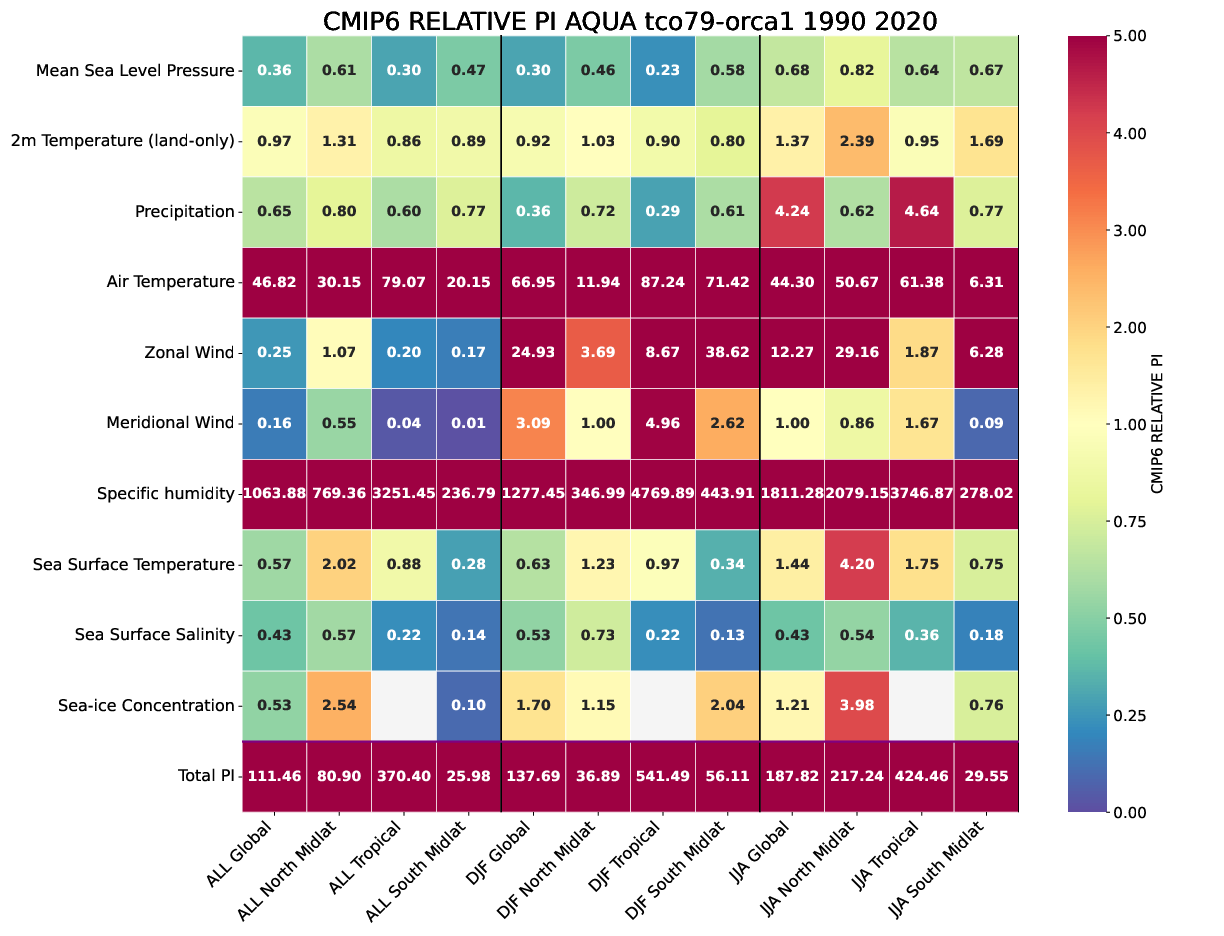

In [51]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices
from wand.image import Image as WImage # to open PDFs in jupyter

model_atm = 'IFS'
model_oce = 'FESOM'
exp = 'tco79-orca1'
year1 = 1990
year2 = 2020
numproc = 1
interface = '../config/interface_AQUA.yml'
config = '../config/ecmean_config_replicability.yml'

performance_indices(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)

img = WImage(filename=f'/pfs/lustrep3/scratch/project_465000454/AQUA-workflow/ecmean/figures/PI4_EC23_{exp}_AQUA_r1i1p1f1_{year1}_{year2}.pdf')
img

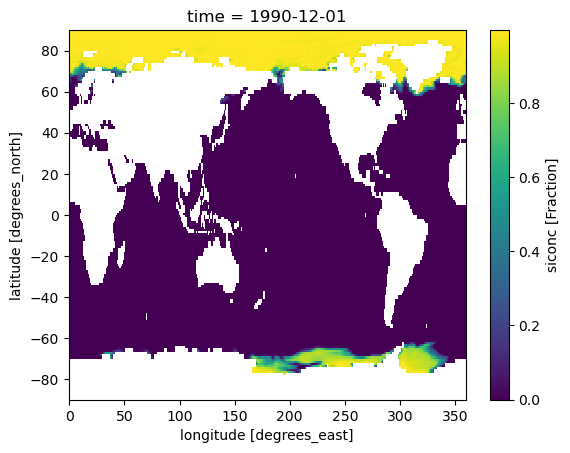

In [39]:
data.siconc[10].plot()

2023-09-05 14:06:52 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...


Welcome to ECmean4 v0.1.4: Running global_mean!


2023-09-05 14:06:52 | ecmean.libs.support |  WARNING -> Atmosphere grid is is a lonlat grid!
2023-09-05 14:06:52 | ecmean.libs.support |  WARNING -> Oceanic grid is is a lonlat grid!
2023-09-05 14:06:52 | ecmean.libs.support |  WARNING -> No mask available for oceanic vars, this might lead to inconsistent results...


Average: psl ALL Global 1011.7518679110265
Average: tas ALL Global 12.52637008796512
Average: pr ALL Global 2.6535466505264087


2023-09-05 14:06:56 | ecmean |  WARNING -> Analysis done in 3.7164 seconds
2023-09-05 14:06:57 | ecmean |  WARNING -> Postproc done in 1.2406 seconds


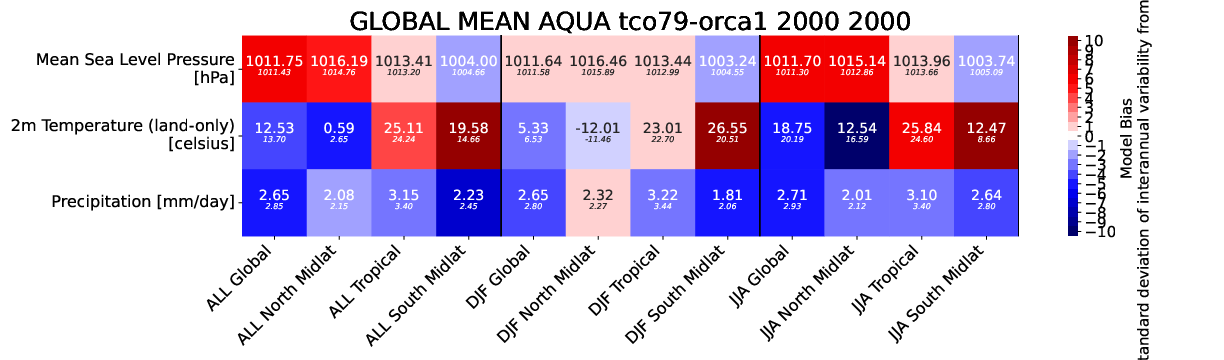

In [23]:
global_mean(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)
img = WImage(filename=f'/pfs/lustrep3/scratch/project_465000454/AQUA-workflow/ecmean/figures/global_mean_{exp}_AQUA_r1i1p1f1_{year1}_{year2}.pdf')
img